In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean,std
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import json 
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
f = open('/content/algoparams_from_ui.json',)  
data = json.load(f) 
type(data)

dict

###Step1: Reading Dataset

In [ ]:
df = pd.read_csv(data['design_state_data']['session_info']['dataset'])


In [ ]:
#Visualize the dataset
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Length: 147, dtype: int64

In [ ]:
 # Read the target variable
df[(data['design_state_data']['target']['target'])]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

###Step2 : Reading Features and feature handling

In [ ]:
for item in data['design_state_data']['feature_handling']:
   feature = data['design_state_data']['feature_handling'][item]
   if feature['feature_name'] != 'species':
     if feature['feature_details']['impute_with'] =='Average of values':
      imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
      df[feature['feature_name']] = imputer.fit_transform(df[feature['feature_name']].values.reshape(-1,1))
     if feature['feature_details']['impute_with'] =='custom':
      imputer = SimpleImputer(missing_values=np.NaN, strategy='constant',fill_value=-1)
      df[feature['feature_name']] = imputer.fit_transform(df[feature['feature_name']].values.reshape(-1,1))
   else:
     lbl = LabelBinarizer()
     df[feature['feature_name']] = lbl.fit_transform(df[feature['feature_name']])


  

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
4.9           3.1          1.5           0.1          1          3
5.8           2.7          5.1           1.9          0          2
              4.0          1.2           0.2          1          1
5.9           3.0          4.2           1.5          0          1
6.2           3.4          5.4           2.3          0          1
                                                                ..
5.5           2.3          4.0           1.3          0          1
              2.4          3.7           1.0          0          1
                           3.8           1.1          0          1
              2.5          4.0           1.3          0          1
7.9           3.8          6.4           2.0          0          1
Length: 147, dtype: int64

### Step3 : Train_test_split

In [ ]:
#drop target column before split

X = df.drop(data['design_state_data']['target']['target'],axis=1)
y = df[data['design_state_data']['target']['target']]
print(X.head(),y.head())



   sepal_length  sepal_width  petal_length  species
0           5.1          3.5           1.4        1
1           4.9          3.0           1.4        1
2           4.7          3.2           1.3        1
3           4.6          3.1           1.5        1
4           5.0          3.6           1.4        1 0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,species
4,5.0,3.6,1.4,1
32,5.2,4.1,1.5,1
142,5.8,2.7,5.1,0
85,6.0,3.4,4.5,0
86,6.7,3.1,4.7,0
...,...,...,...,...
71,6.1,2.8,4.0,0
106,4.9,2.5,4.5,0
14,5.8,4.0,1.2,1
92,5.8,2.6,4.0,0


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,species
73,6.1,2.8,4.7,0
18,5.7,3.8,1.7,1
118,7.7,2.6,6.9,0
78,6.0,2.9,4.5,0
76,6.8,2.8,4.8,0
31,5.4,3.4,1.5,1
64,5.6,2.9,3.6,0
141,6.9,3.1,5.1,0
68,6.2,2.2,4.5,0
82,5.8,2.7,3.9,0


### Step 4: Model Building based on prediction_type

In [ ]:
#identify the prediction_type
prediction_type = data['design_state_data']['target']['prediction_type']
print(prediction_type)

Regression




 Random Forest Regression
Score: 0.9023750807814052
CV mean score:  0.8763846549960104
test Prediction:
[1.62 0.34 2.11 1.62 1.78 0.3  1.38 1.85 1.6  1.48 1.8  0.33 0.35 0.3
 0.29 1.58 2.13 1.4  1.65 2.09 0.36 1.75 0.35 2.09 2.12 1.78 2.1  2.17
 0.33 0.36 0.34 0.29 1.65 0.36 0.34 1.72 1.69 0.31]
Mean Absolute Error: 0.1739473684210526
Mean Squared Error: 0.045644736842105266
Mean Root Squared Error: 0.2136462890904152


 Gradient Boosting for Regression
Score: 0.99851703471772
CV mean score:  0.8879188025699584
test Prediction:
[1.49695573 0.40600178 1.61668148 1.53802662 1.56053373 0.18700221
 1.00304822 1.47256769 1.55187242 1.17624304 1.94493054 0.20747752
 0.34441352 0.10821539 0.40493688 1.44095959 1.83535551 1.36200793
 1.50395595 1.7820059  0.23130155 1.7686548  0.20747752 1.7820059
 2.1902772  2.03310875 1.76864989 2.34126936 0.20747752 0.20747752
 0.26986003 0.18264588 1.40282191 0.20747752 0.20747752 1.48832873
 1.48363081 0.19942512]
Mean Absolute Error: 0.1700568685043570

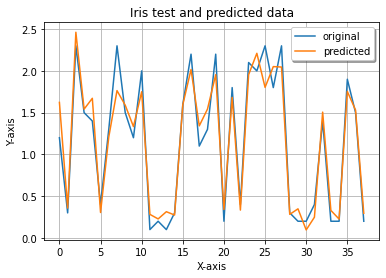

In [ ]:
#select the models to be built based on the prediction_type
models=[]
for model in data['design_state_data']['algorithms']:
  algomodel = data['design_state_data']['algorithms'][model]
  if algomodel['model_name'] =='LinearRegression':
    print("\n\n LinearRegression")
    lr = LinearRegression()
    lrmodel = lr.fit(X_train,y_train)
    print("coeficients")
    print(lr.coef_)
    print("Score:")
    print(lr.score(X_train,y_train))
    print("test Prediction:")
    pred = lr.predict(X_test)
    print(pred)
    print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', mean_squared_error(y_test, pred))
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

  if algomodel['model_name']=='Stochastic Gradient Descent':
    print("\n\n SGD REgression")
    sgd = SGDRegressor(alpha=0.005, epsilon=0.01, eta0=0.001,penalty='elasticnet',learning_rate='constant')
    sgdmodel = sgd.fit(X_train, y_train)
    # evaluate model
    score = sgd.score(X_train, y_train)
    print("Score:", score)
    cv_score = cross_val_score(sgd, X_train, y_train, cv = 10)
    print("CV mean score: ", cv_score.mean())
    print("test Prediction:")
    pred = sgd.predict(X_test)
    print(pred)
    ypred = sgdmodel.predict(X_test)

    mse = mean_squared_error(y_test, ypred)
    print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", mse**(1/2.0))

    x_ax = range(len(y_test))
    plt.plot(x_ax, y_test, label="original")
    plt.plot(x_ax, ypred, label="predicted")
    plt.title("Iris test and predicted data")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.grid(True)
    plt.show() 
    
  
  if algomodel['model_name'] =='Decision Tree Regressor':
    print("\n\n DecisionTree Regression")
    dtreeRgr = DecisionTreeRegressor(ccp_alpha=0.0, max_depth=7,
                      min_impurity_decrease=0.0,min_samples_leaf=0.05, 
                      random_state=0, splitter='best')
    dtreeModel = dtreeRgr.fit(X_train,y_train) 
    # evaluate model
    score = dtreeRgr.score(X_train, y_train)
    print("Score:", score)
    cv_score = cross_val_score(dtreeRgr, X_train, y_train, cv = 10)
    print("CV mean score: ", cv_score.mean())
    print("test Prediction:")
    pred = dtreeRgr.predict(X_test)
    print(pred)
    print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', mean_squared_error(y_test, pred))
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
  
  if algomodel['model_name']=='Gradient Boosted Trees Regressor':
    print("\n\n Gradient Boosting for Regression")
    gbtreeRgr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.2, 
                                       n_estimators=22, subsample=1.0, 
                                       min_samples_split=2, min_samples_leaf=1,
                                       min_weight_fraction_leaf=0.0, max_depth=7)
    
    gbtreemodel =  gbtreeRgr.fit(X_train,y_train)
    # evaluate model
    score = gbtreeRgr.score(X_train, y_train)
    print("Score:", score)
    cv_score = cross_val_score(gbtreeRgr, X_train, y_train, cv = 10)
    print("CV mean score: ", cv_score.mean())
    print("test Prediction:")
    pred = gbtreeRgr.predict(X_test)
    print(pred) 
    print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', mean_squared_error(y_test, pred))
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred))) 

  if algomodel['model_name']=='Random Forest Regressor': 
    print("\n\n Random Forest Regression")  
    rfRgr = RandomForestRegressor(max_depth=5, max_features='auto', 
                      max_samples=10, min_samples_leaf=1,min_samples_split=2,
                      n_estimators=10)
    rfmodel = rfRgr.fit(X_train,y_train)
    # evaluate model
    score = rfRgr.score(X_train, y_train)
    print("Score:", score)
    cv_score = cross_val_score(rfRgr, X_train, y_train, cv = 10)
    print("CV mean score: ", cv_score.mean())
    print("test Prediction:")
    pred = rfRgr.predict(X_test)
    print(pred) 
    print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', mean_squared_error(y_test, pred))
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred))) 

  if algomodel['model_name'] =='XG Boost':
    print("\n\n XGBoost Regression") 
    xgbModel = xgb.XGBRegressor()
 
    #Applying hyper parameters
    n_estimators = range(56,100,89) 
    learning_rate = 0.09
    hyperparameters = data['design_state_data']['hyperparameters']
    random_state = hyperparameters['random_state']
    shuffle = hyperparameters['shuffle_grid']
    max_iter= [hyperparameters['max_iterations']]
    num_of_folds = hyperparameters['num_of_folds']
    early_stopping_rounds = algomodel['early_stopping_rounds']
    param_grid = {'n_estimators':n_estimators, 
                  'max_iter': max_iter,
                  'learning_rate':[learning_rate],
                  'booster':['dart'],
                  'objective':['reg:squarederror'],
                  'n_folds':[num_of_folds]}

    grid_search = GridSearchCV(xgbModel, param_grid, n_jobs=-1, cv=12)
    grid_result = grid_search.fit(X_train, y_train)
    print("Score::",grid_search.best_score_)
    print("Best params", grid_search.best_params_)
    pred =grid_search.predict(X_test)
    grid_search
    print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
    print('Mean Squared Error:', mean_squared_error(y_test, pred))
    print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred))) 
    


###Step5: Saving best model as pickle file  

In [ ]:
#Choosing xgboost which has least value of RMSE 
# Saving model to disk
pickle.dump(gbtreeRgr, open('gbtreemodel.pkl', 'wb'))

In [ ]:
X_train.head()


,sepal_length,sepal_width,petal_length,species
4,5.0,3.6,1.4,1
32,5.2,4.1,1.5,1
142,5.8,2.7,5.1,0
85,6.0,3.4,4.5,0
86,6.7,3.1,4.7,0
